## Plotting tracks static

In [1]:
## Importing relevant libraries
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec

from math import log, exp, tan, cos, pi, atan, ceil
from PIL import Image

from Config import config

import requests

from utils import dataset_utils
from utils import createAISdata

import pickle

import progressbar

In [2]:
datasets_path = "C://Users//asm//OneDrive - Netcompany/University//Master Thesis//Data//Pickle//"

In [3]:
#LAT_EDGES, LON_EDGES, ... are a list of bin edges obtained by np.arange(LAT_MIN, LAT_MAX+(LAT_RES/10000), LAT_RES) ect.
#I use (config.LAT_EDGES, config.LON_EDGES, config.SOG_EDGES, config.COG_EDGES

edges = (config.LAT_EDGES, config.LON_EDGES, config.SOG_EDGES, config.COG_EDGES)

In [4]:
def Plot4HotEncodedTrack(encodedTrack, edges, ax=None):
    
    seq_len, data_dim = encodedTrack.shape
    ##Bin Edges from Config file
    lat_edges, lon_edges, speed_edges, course_edges = edges
    
    lat_dim = len(lat_edges) - 1
    lon_dim = len(lon_edges) - 1
    speed_dim = len(speed_edges) - 1
    course_dim = len(course_edges) - 1
    
    lat_centers = [round((lat_edges[i]+lat_edges[i+1])/2,3) for i in range(len(lat_edges)-1)] 
    lon_centers = [round((lon_edges[i]+lon_edges[i+1])/2,3) for i in range(len(lon_edges)-1)] 
    speed_centers = [round((speed_edges[i]+speed_edges[i+1])/2,3) for i in range(len(speed_edges)-1)] 
    course_centers = [round((course_edges[i]+course_edges[i+1])/2,3) for i in range(len(course_edges)-1)] 
   
    lat = np.zeros((seq_len))
    lon = np.zeros((seq_len))
    speed = np.zeros((seq_len))
    course = np.zeros((seq_len))
    
    for i in range(seq_len):
        lat[i] = lat_centers[np.argmax(encodedTrack[i,0:lat_dim])]
        lon[i] = lon_centers[np.argmax(encodedTrack[i,lat_dim:(lat_dim+lon_dim)])]
        speed[i] = speed_centers[np.argmax(encodedTrack[i,(lat_dim+lon_dim):(lat_dim+lon_dim+speed_dim)])]
        course[i] = course_centers[np.argmax(encodedTrack[i,(lat_dim+lon_dim+speed_dim):(lat_dim+lon_dim+speed_dim+course_dim)])]
    
    points = np.array([lon, lat, speed]).T.reshape(-1, 1, 3)
    segments_speed = np.concatenate([points[:-1], points[1:]], axis=1)
    points = np.array([lon, lat, [0]*seq_len]).T.reshape(-1, 1, 3)
    segments_0 = np.concatenate([points[:-1], points[1:]], axis=1)
    
    cmap=plt.get_cmap('viridis') #Blue is start, yellow is end
    colors=[cmap(float(ii)/(seq_len-1)) for ii in range(seq_len-1)]    
    
    if ax == None:
        fig = plt.figure()
        ax = plt.axes(projection="3d")
            
        for ii in range(2,seq_len-1):
            segii=segments_speed[ii]
            lii, =ax.plot(segii[:,0],segii[:,1],segii[:,2],color=colors[ii])
            segii=segments_0[ii]
            lii, =ax.plot(segii[:,0],segii[:,1],segii[:,2],'--',color=colors[ii])
            
            lii.set_solid_capstyle('round')
            
        ax.set_xlabel('longitude')
        ax.set_ylabel('latitude')
        ax.set_zlabel('speed m/s')
    else:
        for ii in range(2,seq_len-1):
            segii=segments_speed[ii]
            lii, =ax.plot(segii[:,0],segii[:,1],segii[:,2],color=colors[ii])
            segii=segments_0[ii]
            lii, =ax.plot(segii[:,0],segii[:,1],segii[:,2],'--',color=colors[ii])
            
            lii.set_solid_capstyle('round')
            
        ax.set_xlabel('longitude')
        ax.set_ylabel('latitude')
        ax.set_zlabel('speed m/s')
    
    return ax

In [5]:
trainset = dataset_utils.AISDataset(dataPath = datasets_path, fileName = "CargTank.pkl")

dataPath: C://Users//asm//OneDrive - Netcompany/University//Master Thesis//Data//Pickle//
fileName: CargTank.pkl
self.params[dataFileName]: CargTank_idxs.pkl


self.datapath 12 C://Users//asm//OneDrive - Netcompany/University//Master Thesis//Data//Pickle//CargTank_idxs.pkl
index:  25193565   total_updates:  621159


In [6]:
def plotDataset(dataset,edges, n=100):
    
    #xlist = []
    #ylist = []
    ax=None
    for i in progressbar.progressbar(range(0,n)):
        ##mmsi, _, _, _, _, _, track = dataset[i]
        mmsi,label,trackLength,input,target = dataset[i]
        
        ax = Plot4HotEncodedTrack(input, edges, ax)
        
        #lon, lat = PlotDatasetTrack(target,edges)
        #xlist.extend(lon)
        #ylist.extend(lat)
        #xlist.append(None)
        #ylist.append(None)
        
    #ax.plot(xlist,ylist,'gray')
    #ax.set_xlabel('longitude')
    #ax.set_ylabel('latitude')
    
    return ax

100% (100 of 100) |######################| Elapsed Time: 0:00:13 Time:  0:00:13


<Axes3DSubplot:xlabel='longitude', ylabel='latitude'>

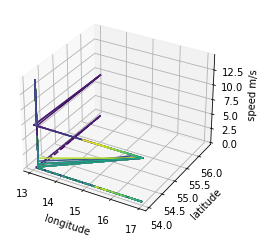

In [7]:
plotDataset(trainset,edges, n=100)

In [20]:
mmsi,label,trackLength,input,target = trainset[2]

<Axes3DSubplot:xlabel='longitude', ylabel='latitude'>

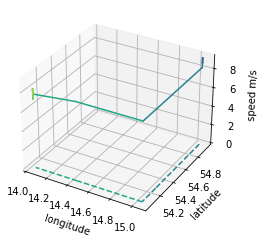

In [21]:
Plot4HotEncodedTrack(target, edges, ax=None)

In [16]:
input

torch.Size([103, 167])

In [ ]:
def plotDataset(dataset,ax, edges, n=5000):
    

    for i in progressbar.progressbar(range(0,n)):
        ##mmsi, _, _, _, _, _, track = dataset[i]
        mmsi,label,trackLength,input,target = dataset[i]
        
        lon, lat = PlotDatasetTrack(target,edges)
        xlist.extend(lon)
        ylist.extend(lat)
        xlist.append(None)
        ylist.append(None)
        
    ax.plot(xlist,ylist,'gray')
    ax.set_xlabel('longitude')
    ax.set_ylabel('latitude')
    
    return ax